# Multivariate Data and the Grammer of Graphics

In this notebook we will use the dataset *Penguins in the Palmer Archiplago, Antartica* 

In [2]:
import pandas as pd
df = pd.read_csv("https://datasci112.stanford.edu/data/penguins.csv")

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


To see the relationships between two categorical variables, we can pass the list of features.
- Using `Series.unstack()` creates a multiIndex instead of stacking all the groups in one.
- If we have null data(NaN), we can ue `Series.fillna(0)`. This will fill the empty cells with the parameter (0 here).

In [3]:
df[["species", "island"]].value_counts()

species    island   
Gentoo     Biscoe       124
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Name: count, dtype: int64

In [4]:
df[["species", "island"]].value_counts().unstack()

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,56.0,52.0
Chinstrap,NaN,68.0,NaN
Gentoo,124.0,NaN,NaN


In [5]:
df[["species", "island"]].value_counts().unstack().fillna(0)

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,56.0,52.0
Chinstrap,0.0,68.0,0.0
Gentoo,124.0,0.0,0.0


To see the relationships between categorical and quantative variables. We can use `Series.groupby()` for the categorical variabl and give the array of quantative variables.

In [10]:
df.groupby("species")[["bill_length_mm", "bill_depth_mm"]].mean()

,bill_length_mm,bill_depth_mm
species,,
Adelie,38.791391,18.346358
Chinstrap,48.833824,18.420588
Gentoo,47.504878,14.982114


## Relations between Quantitative Variables

- The relationship between two quantitative variables can be *visualized* using a **scatterplot**
- The relationship between two quantitative variables can be *summarize* using the correlation coefficent. (if variables: x, y, then correlation coefficent = r) 


$$
r = \frac{1}{n - 1} \sum \left( \frac{x - \bar{x}}{s_x} \right) \left( \frac{y - \bar{y}}{s_y} \right)
$$



<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

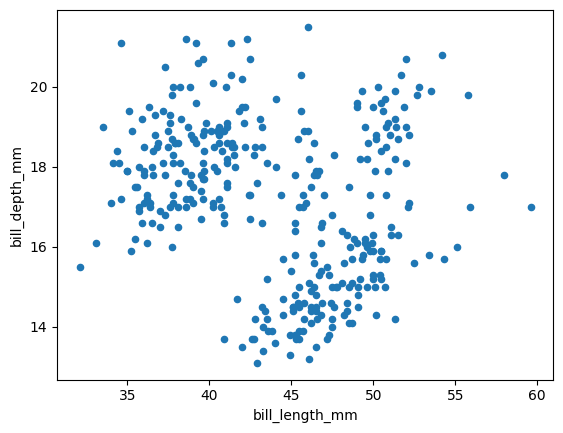

In [7]:
df.plot.scatter(x="bill_length_mm",
                y="bill_depth_mm")

- `x.isnull` -> gives True for missing (NaN) values and False otherwise.
- `~` -> is the logical NOT operator, which inverts the Boolean values.
- Therefore, `~x.isnull()` is True for valid elements and False for missing ones.

In [8]:
x = df["bill_length_mm"]
y = df["bill_depth_mm"]

n = (~x.isnull() & ~y.isnull()).sum()

(((x- x.mean()) / x.std()) * ((y - y.mean()) / y.std())).sum() / (n - 1)

np.float64(-0.2350528703555327)

- A positive correlation means that **x** increases, **y** tends to increase also.
- A negative correlation means that as **x** increases, **y** tens to decrease.
- The correlation coefficent **r** is always betwee -1 and 1.
- The closer the correlation coefficent is to 1 or -1, the stronger the relationship.


Since the correlation coefficent between **bill length** and **bill depth is -0.235, bills that are longer tend to be less deep.

There is a built-in function for calculating correlation coefficent.
`DataFrame.corr()`. This function outputs the **correlation matrix**.

In [9]:
df[["bill_length_mm", "bill_depth_mm"]].corr()

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,-0.235053
bill_depth_mm,-0.235053,1.000000


## Multivariate Data

### Aestethic Mapping

Aestethic mapping is used for visualizing multivariate data on two-dimensional paper or screen by mapping other dimensions in the data to other dimensions in the graphic.

**Aestethics for quantitative variables:**
- **Size:** The larger the value, the larger the point or symbol.
- **Intensity / Lightness:** The color becomes darker or lighter as the value changes.
- **Position (x, y):** The variable's value determines where it is placed on the plot.

**Aestethics for categorical variables:**
- **Hue:** Different categories are shown with different colors.
- **Shape:** Each category can be represented by a different marker shape.
- **Line type:** Categories can also be distinguished by kine styles.

### Facets

One way to pack more variables without overplotting is to show many small plots. This is also called *small multiples*.

Facet is the process of subgrouping the data and plotting each one.

### Grammar of Graphics

The **grammar of graphics** says that every plot can be described by just a few components:
- Aestethic mapping
- Geometric objects (e.g. points, lines, bars)
- and a few other things

The ideal library generates a plot from a specifiacation of the aestethic mappnigs and the geometric object.

- x <- longitude
- y <- latitude
- width <- size of army
- color <- direction of army
